**IMPORTS**

In [ ]:
# All imports
import pyodbc
import pandas as pd
from numpy import int64

**FETCH DATA FROM SQL SERVER**

In [ ]:
# Connect to SQL database using 'pyodbc' 
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=MUNEEBS-PC\\BARTENDER;"
    "DATABASE=SampleSalesDB;"
    "Trusted_Connection=yes;"
)

# Query all the data from database and store in pandas
query = "SELECT * FROM dbo.sales_data_sample"
df = pd.read_sql(query, conn)
# print(df.head())

C:\Users\munee\AppData\Local\Temp\ipykernel_17996\1936504081.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


**HANDLE NULL VALUES**

In [ ]:
'''
HANDLING NULL VALUES
'''
# Check and Remove null values
df = df.fillna("")
# print(df.isnull().sum())

# Combine addressline1 and addressline2 to make new column ADDRESS
df["ADDRESS"] = df["ADDRESSLINE1"] + " " + df["ADDRESSLINE2"]

# Drop the column ADDRESSLINE1 AND ADDRESSLINE2
df = df.drop(columns=["ADDRESSLINE1", "ADDRESSLINE2"])

**VALIDATE DATATYPES**

In [ ]:
# Get all column names and their datatypes
# print(df.dtypes)

# Change dtype of month_id to int and orderDate to datetime
df["MONTH_ID"] = df["MONTH_ID"].astype(int64)
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

**CALCULATE REVENUE PER ORDER**

In [ ]:
# Multiply column PRICEEACH and QUANTITYORDERED to get REVENUE column
df["REVENUE"] = df["QUANTITYORDERED"] * df["PRICEEACH"]

**REVENUE TREND CHARTS**

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month-Year', ylabel='Revenue'>

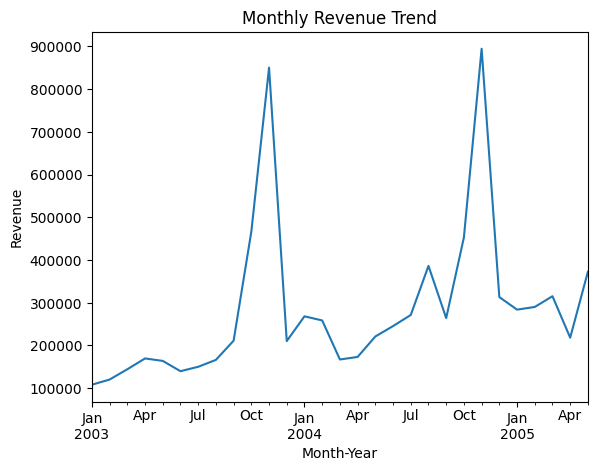

In [20]:
'''
LINE CHART FOR MONTHLY REVENUE TREND
'''
# Create a 'YEAR_MONTH' column for grouping by year and month
df['YEAR_MONTH'] = df['ORDERDATE'].dt.to_period('M')

monthly_revenue = df.groupby('YEAR_MONTH')['REVENUE'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', xlabel='Month-Year', ylabel='Revenue')

<Axes: title={'center': 'Revenue by Region'}, xlabel='Region', ylabel='Revenue'>

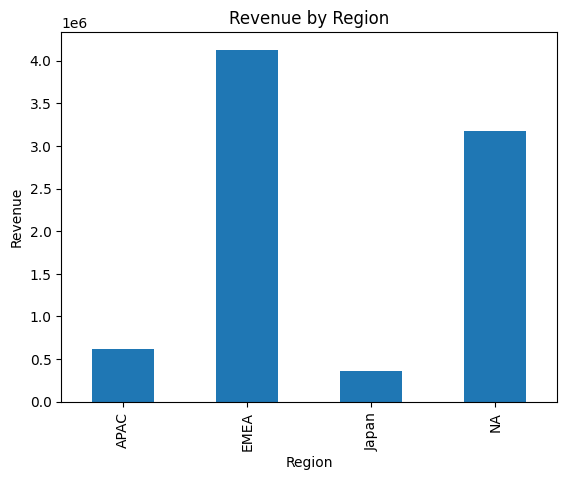

In [21]:
'''
BAR CHART FOR REVENUE CONTRIBUTION BY REGION
'''
region_revenue = df.groupby('TERRITORY')['REVENUE'].sum()
region_revenue.plot(kind='bar', title='Revenue by Region', xlabel='Region', ylabel='Revenue')

<Axes: title={'center': 'Top Products Sold'}, xlabel='Product', ylabel='Revenue'>

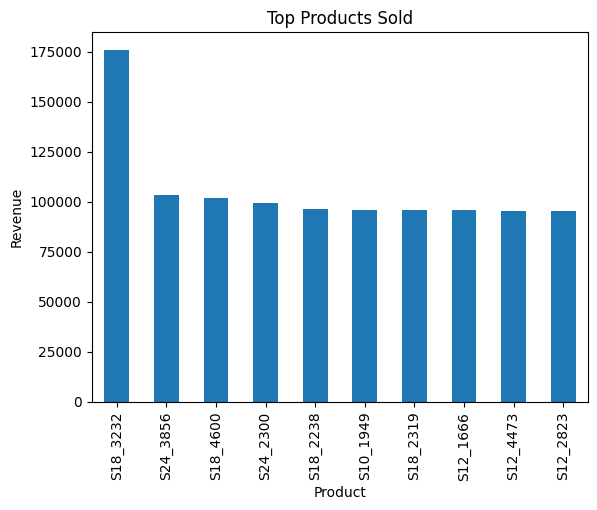

In [30]:
'''
BAR CHART FOR TOP 10 PRODUCTS BY SALE
'''
product_revenue = df.groupby('PRODUCTCODE')['REVENUE'].sum().sort_values(ascending=False).head(10)
product_revenue.plot(kind='bar', title="Top Products Sold", xlabel='Product', ylabel='Revenue')

In [24]:
print(df.columns.tolist())

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'ADDRESS', 'REVENUE', 'YEAR_MONTH']
